## Ćwiczenie 1

Wczytaj plik [`img/soyjaks.jpg`](https://knowyourmeme.com/memes/two-soyjaks-pointing) i spróbuj odtworzyć poniższy obrazek.

![Two Soyjaks Pointing](img/soyjaks-final.png)

In [399]:
import cv2 as cv
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

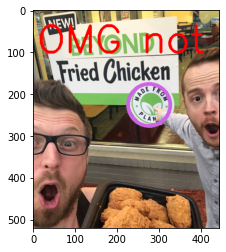

In [404]:
image = cv.imread("img/soyjaks.jpg", cv.IMREAD_COLOR)

image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image = image[0:520, 45:490]
cv.circle(image, (276, 226), 50, (205, 100, 229), 8)

cv.putText(image, 'OMG not chikenz!', (10, 100), cv.FONT_HERSHEY_SIMPLEX , 3, (255,0,0), 5)
plt.imshow(image)

## Ćwiczenie 2

Załaduj obrazy `img/pipe.png` oraz `img/man-without-pipe.png` i wykonaj operacje tak, aby uzyskać poniższy obraz.


![Człowiek z fajką](img/man-with-pipe.png)

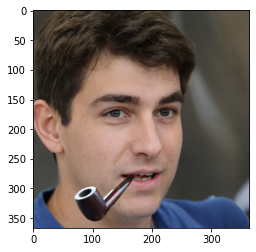

In [401]:

pipe = cv.imread("img/pipe.png", cv.IMREAD_UNCHANGED)
pipe = cv.cvtColor(pipe, cv.COLOR_BGRA2RGBA)

pipe = cv.resize(pipe, None, fx=0.55, fy=0.55)
pipe = cv.flip(pipe, 1)

man = cv.imread("img/man-without-pipe.png", cv.IMREAD_UNCHANGED)

man = cv.cvtColor(man, cv.COLOR_BGR2RGB)

alpha_s = pipe[:, :, 3] / 255.0

x_offset=70
y_offset=280
y1, y2 = y_offset, y_offset + pipe.shape[0]
x1, x2 = x_offset, x_offset + pipe.shape[1]

alpha_s = pipe[:, :, 3] / 255.0
alpha_l = 1.0 - alpha_s

for c in range(0, 3):
    man[y1:y2, x1:x2, c] = (alpha_s * pipe[:, :, c] +
                              alpha_l * man[y1:y2, x1:x2, c])
plt.imshow(man)